# Lesson 8 - Time Series Analysis 

## Author - Nourhan El Zarif



## Instructions

Using the California dairy production dataset, perform time series analysis on the data for one of Cottage Cheese Production, Milk Production, or Ice Cream Production (your choice) to answer the following questions:

1. Is this time series stationary?
2. Is there a significant seasonal component?
3. For the residual from the STL decomposition of the time series, what is the order of the ARMA(p,q) process that best fits?

Then forecast production for 12 months and report both numeric values and plot the confidence intervals.

1. Are the confidence intervals reasonably small compared to the forecast means?
2. How do the confidence intervals behave as time moves to the future?


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [1]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/CADairyProduction.csv"

In [2]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load Data
dairy = pd.read_csv(fileName, header = 0)
#setting index to timeseries
dairy.index = pd.date_range(start = '1-1-1995', end = '12-31-2013', freq = 'M')
dairy.head()

,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
1995-01-31,1995,Jan,4.370,51.595,2.112,0.9803,1,1,1
1995-02-28,1995,Feb,3.695,56.086,1.932,0.8924,2,4,8
1995-03-31,1995,Mar,4.538,68.453,2.162,0.8924,3,9,27
1995-04-30,1995,Apr,4.280,65.722,2.130,0.8967,4,16,64
1995-05-31,1995,May,4.470,73.730,2.227,0.8967,5,25,125


Text(0.5, 1.0, 'California Dairy Production Time Series')

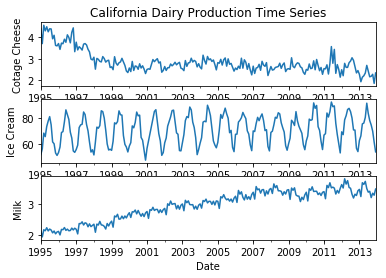

In [4]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1)
dairy['Cotagecheese.Prod'].plot(ax = ax1)
dairy['Icecream.Prod'].plot(ax = ax2)
dairy['Milk.Prod'].plot(ax = ax3)
ax1.set_ylabel('Cotage Cheese')
ax2.set_ylabel('Ice Cream')
ax3.set_ylabel('Milk')
ax3.set_xlabel('Date')
ax1.set_title('California Dairy Production Time Series')


The time series plots above show the production of dairy from 1995 to 2013. During this period we can see the production of cottage cheese has decreased overall. Ice cream production has stayed cpnsistent with a seasonal behavior. Milk has increased in production, with the seasonal component growing with time. 

I will analyze the production of milk during this period. 

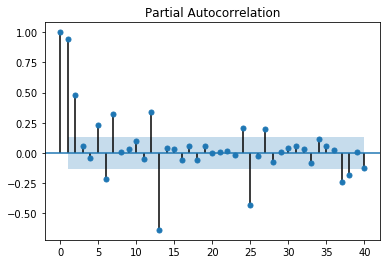

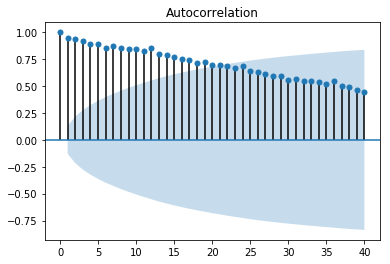

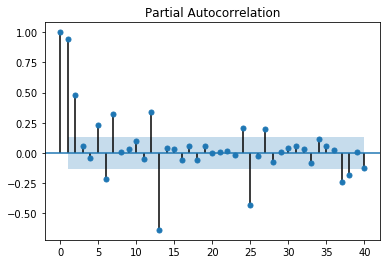

In [5]:
import statsmodels.graphics.tsaplots as splt
splt.plot_acf(dairy['Milk.Prod'], lags = 40)
splt.plot_pacf(dairy['Milk.Prod'], lags = 40)

The autocorrelation decays slowly, and the partial autocorrelation has many significant non-zero lags. Milk production appears to have a trend, and any time series with a trend is not stationary.

# Time Series Analysis

## Is the Time Series Stationary?

First step in determining if the time series is stationary is decomposing it.

               resid     trend  seasonal
1995-01-31       NaN       NaN  0.027271
1995-02-28       NaN       NaN -0.179759
1995-03-31       NaN       NaN  0.144447
1995-04-30       NaN       NaN  0.079891
1995-05-31       NaN       NaN  0.163026
1995-06-30       NaN       NaN  0.011056
1995-07-31  0.053120  2.110458  0.020421
1995-08-31  0.035155  2.113000  0.003845
1995-09-30  0.065041  2.116125 -0.119166
1995-10-31  0.027444  2.117958 -0.024403
1995-11-30  0.028062  2.119583 -0.117646
1995-12-31 -0.020600  2.120583 -0.008984


,resid,trend,seasonal
2013-01-31,0.008687,3.426042,0.027271
2013-02-28,-0.014074,3.424833,-0.179759
2013-03-31,0.102178,3.429375,0.144447
2013-04-30,0.110900,3.431208,0.079891
2013-05-31,0.124016,3.432958,0.163026
2013-06-30,0.042236,3.435708,0.011056
2013-07-31,NaN,NaN,0.020421
2013-08-31,NaN,NaN,0.003845
2013-09-30,NaN,NaN,-0.119166
2013-10-31,NaN,NaN,-0.024403


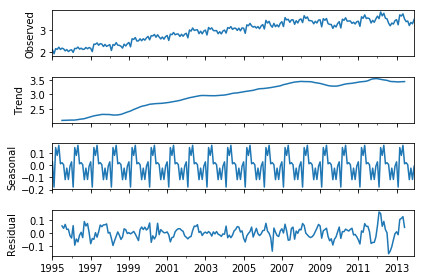

In [6]:
import statsmodels.tsa.seasonal as sts
def decomp_ts(ts, freq = 'M', model = 'additive'):
    res = sts.seasonal_decompose(ts, model = model) #, freq = freq)
    #resplot = res.plot()
    res.plot()
    return(pd.DataFrame({'resid': res.resid, 
                         'trend': res.trend, 
                         'seasonal': res.seasonal},
                       index = ts.index) )

decomp = decomp_ts(dairy['Milk.Prod'])
print(decomp[:12])
decomp[-12:]

The decompositin shows that the dairy production time series is not stationary because it has a trend. 

## Seasonal Component
The decomposition above shows a strong seasonal pattern that occurs annually.

To see if the residuals are stationary, we can perform the Dicky Fuller test.

In [7]:
from statsmodels.tsa.stattools import adfuller
def DF_Test(ts):
    stationary = adfuller(ts)
    ## Print the results
    print('D-F statistic = ' + str(stationary[0]))
    print('p-value = ' + str(stationary[1]))
    print('number of lags used = ' + str(stationary[2]))
    print('Critical value at 5% confidence = ' + str(stationary[4]['5%']))
    print('Critical value at 10% confidence = ' + str(stationary[4]['10%']))
DF_Test(decomp.resid[6:-6])  

D-F statistic = -5.102729220342747
p-value = 1.3842923938680407e-05
number of lags used = 14
Critical value at 5% confidence = -2.876029332045744
Critical value at 10% confidence = -2.5744932593252643


The p-value is very close to 0, and rejects the null hypothesis that the residual is not stationary.

## ARMA order
To get the ARMA order

3.For the residual from the STL decomposition of the time series, what is the order of the ARMA(p,q) process that best fits?

In [8]:
def model_ARIMA_2(ts, order):
    from statsmodels.tsa.arima_model import ARIMA
    from statsmodels.tsa.arima_model import ARIMAResults    
    model = ARIMA(ts, order = order)
    model_fit = model.fit(disp=0, method='mle', trend='nc')
    BIC = ARIMAResults.bic(model_fit)
    print('Testing model of order: ' + str(order) + ' with BIC = ' + str(BIC))
    return(BIC, order, model_fit)

def step_ARIMA(resid, p_max, d_max, q_max):
    from statsmodels.tsa.arima_model import ARIMAResults    
    from statsmodels.tsa.arima_model import ARIMA
    best_BIC = 9999999999999999.0
    for p in range(p_max + 1):
        for d in range(d_max + 1):
            for q in range(q_max + 1):
                if(p > 0 or q > 0):
                    try:
                        order = (p, d, q)
                        BIC, order, model = model_ARIMA_2(resid, order)
                        if(BIC < best_BIC):
                            best_model = model
                            best_BIC = BIC
                            best_order = order
                    except: 
                        pass        
    return(best_BIC, best_order, best_model) 

BIC, order, model = step_ARIMA(decomp.resid[6:-6], 3, 3, 3)    
print('***************************************')
print('Best model with BIC = ' + str(BIC) + ' and with order '+ str(order))

Testing model of order: (0, 0, 1) with BIC = -747.2053273053125
Testing model of order: (0, 0, 2) with BIC = -761.6974171906506
Testing model of order: (0, 0, 3) with BIC = -758.1534638214812
Testing model of order: (0, 1, 1) with BIC = -709.8792562744482
Testing model of order: (0, 1, 2) with BIC = -732.8446809314306
Testing model of order: (0, 1, 3) with BIC = -747.7058433697621
Testing model of order: (0, 2, 1) with BIC = -688.6273216434323
Testing model of order: (1, 0, 0) with BIC = -761.5140236073962
Testing model of order: (1, 0, 1) with BIC = -756.3006605890359
Testing model of order: (1, 0, 2) with BIC = -751.8146732033899
Testing model of order: (1, 0, 3) with BIC = -774.6786267031653
Testing model of order: (1, 1, 0) with BIC = -708.979092117055
Testing model of order: (1, 1, 1) with BIC = -747.775253825882
Testing model of order: (1, 1, 2) with BIC = -742.528926418689
Testing model of order: (1, 1, 3) with BIC = -743.5184807133542
Testing model of order: (1, 2, 0) with BIC 

Now that the best model order is known, we can test how the model fits the residuals

In [9]:
def model_ARIMA(ts, order):
    from statsmodels.tsa.arima_model import ARIMA
    model = ARIMA(ts, order = order)
    model_fit = model.fit(disp=0, method='mle', trend='nc')
    print(model_fit.summary())
    return(model_fit)

milk_model = model_ARIMA(decomp.resid[6:-6], (3,0,1))

                              ARMA Model Results                              
Dep. Variable:                  resid   No. Observations:                  216
Model:                     ARMA(3, 1)   Log Likelihood                 412.515
Method:                           mle   S.D. of innovations              0.036
Date:                Mon, 25 Nov 2019   AIC                           -815.031
Time:                        02:44:30   BIC                           -798.154
Sample:                    07-31-1995   HQIC                          -808.213
                         - 06-30-2013                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.resid     1.2798      0.067     18.976      0.000       1.148       1.412
ar.L2.resid    -0.3204      0.109     -2.951      0.004      -0.533      -0.108
ar.L3.resid    -0.2159      0.068     -3.161    

All the coefficients appear to be significant. All the p-values are less than 0.05, and the standard errors are not too big relative to the coefficients.

# Forecasting Production
Then forecast production for 12 months and report both numeric values and plot the confidence intervals.
1.Are the confidence intervals reasonably small compared to the forecast means?
2.How do the confidence intervals behave as time moves to the future?


In [10]:
dairy.head()

,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
1995-01-31,1995,Jan,4.370,51.595,2.112,0.9803,1,1,1
1995-02-28,1995,Feb,3.695,56.086,1.932,0.8924,2,4,8
1995-03-31,1995,Mar,4.538,68.453,2.162,0.8924,3,9,27
1995-04-30,1995,Apr,4.280,65.722,2.130,0.8967,4,16,64
1995-05-31,1995,May,4.470,73.730,2.227,0.8967,5,25,125


In [11]:
#the month count, and month count squared are alreaady existing 

## Normalize the time features
from scipy.stats import zscore
dairy.loc[:, ['Month.Count', 'monthNumSqred']] = dairy.loc[:, ['Month.Count', 'monthNumSqred']].apply(zscore)

#one hot encode the month data
dummies = pd.get_dummies(dairy.loc[:, 'Month'])
dairy[list(dummies.columns)] = dummies
## Print the head of the data frame to look at the dummy variables.
dairy.head(12)

,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed,Apr,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1995-01-31,1995,Jan,4.370,51.595,2.112,0.9803,-1.724471,-1.120740,1,0,...,0,0,1,0,0,0,0,0,0,0
1995-02-28,1995,Feb,3.695,56.086,1.932,0.8924,-1.709277,-1.120548,8,0,...,0,1,0,0,0,0,0,0,0,0
1995-03-31,1995,Mar,4.538,68.453,2.162,0.8924,-1.694084,-1.120226,27,0,...,0,0,0,0,0,1,0,0,0,0
1995-04-30,1995,Apr,4.280,65.722,2.130,0.8967,-1.678890,-1.119776,64,1,...,0,0,0,0,0,0,0,0,0,0
1995-05-31,1995,May,4.470,73.730,2.227,0.8967,-1.663696,-1.119198,125,0,...,0,0,0,0,0,0,1,0,0,0
1995-06-30,1995,Jun,4.238,77.994,2.124,0.9160,-1.648503,-1.118491,216,0,...,0,0,0,0,1,0,0,0,0,0
1995-07-31,1995,Jul,4.377,81.475,2.184,0.9160,-1.633309,-1.117656,343,0,...,0,0,0,1,0,0,0,0,0,0
1995-08-31,1995,Aug,4.368,74.981,2.152,0.8934,-1.618116,-1.116692,512,0,...,0,0,0,0,0,0,0,0,0,0
1995-09-30,1995,Sep,3.917,61.530,2.062,0.8934,-1.602922,-1.115600,729,0,...,0,0,0,0,0,0,0,0,0,1
1995-10-31,1995,Oct,4.078,60.022,2.121,0.9434,-1.587729,-1.114379,1000,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
## Linear regression for modeling trend and seasonality

In [13]:
import sklearn.linear_model as lm
X = dairy.loc[:'2012-12-31', ['Month.Count', 'monthNumSqred', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
Y = dairy.loc[:'2012-12-31', 'Milk.Prod'].as_matrix()
lm_mod = lm.LinearRegression(fit_intercept = False)
mod_fit = lm_mod.fit(X, Y)

## and the predictions and the residual
dairy.loc[:'2012-12-31', 'scores'] = mod_fit.predict(X)
dairy.loc[:'2012-12-31', 'resids'] = dairy.loc[:'2012-12-31', 'scores'] - dairy.loc[:'2012-12-31', 'Milk.Prod']

C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


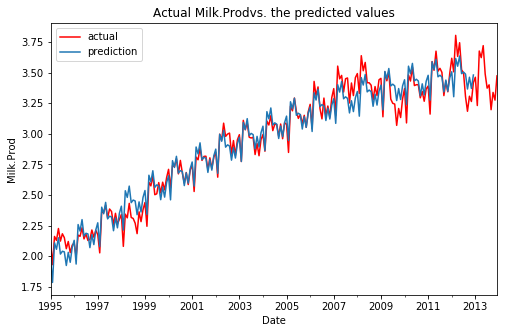

In [14]:
def plot_mod_fit(df, col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 5)) # set plot area
    ax = fig.gca() # define axis  
    df.loc[:, col].plot(color = 'r', ax = ax, label = 'actual')
    df.loc[:, 'scores'].plot(ax = ax, label = 'prediction') 
    ax.set_title('Actual ' + col + 'vs. the predicted values') # Give the plot a main title
    ax.set_xlabel('Date') # Set text for the x axis
    ax.set_ylabel(col)# Set text for y axis
    ax.legend()
plot_mod_fit(dairy, 'Milk.Prod') 

In [15]:
def RMSE(ts, score):
    from math import sqrt
    return sqrt(np.std(ts - score))

## Make the forecast for the next year
X = dairy.loc['2012-12-31':, ['Month.Count', 'monthNumSqred', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
RMSE(dairy.loc['2012-12-31':, 'Milk.Prod'].as_matrix(), mod_fit.predict(X))

C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


0.2770949465587891

In [16]:
## ARMA model for modelling residuals

In [17]:
BIC, order, model_fit = step_ARIMA(dairy.loc[:'2012-12-31', 'resids'], 4, 4, 4)    
print('Best order = ' + str(order) + ' best BIC = ' + str(BIC))

Testing model of order: (0, 0, 1) with BIC = -600.0720719045119
Testing model of order: (0, 0, 2) with BIC = -657.9125674907232
Testing model of order: (0, 0, 3) with BIC = -679.0489798138024
Testing model of order: (0, 0, 4) with BIC = -677.6806661479989
Testing model of order: (0, 1, 1) with BIC = -699.2105747510793
Testing model of order: (0, 1, 2) with BIC = -693.9440060216697
Testing model of order: (0, 1, 3) with BIC = -691.9915766487177
Testing model of order: (0, 1, 4) with BIC = -688.4873819618588
Testing model of order: (0, 2, 1) with BIC = -683.0743799730338
Testing model of order: (1, 0, 0) with BIC = -713.3801093259676
Testing model of order: (1, 0, 1) with BIC = -709.6935946484266
Testing model of order: (1, 0, 2) with BIC = -706.6130113446088
Testing model of order: (1, 0, 3) with BIC = -701.3441225090121
Testing model of order: (1, 0, 4) with BIC = -695.9861103313758
Testing model of order: (1, 1, 0) with BIC = -699.461487126154
Testing model of order: (1, 1, 1) with BI

C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Testing model of order: (3, 1, 2) with BIC = -681.5861799794155
Testing model of order: (3, 1, 3) with BIC = -689.0352335656075
Testing model of order: (3, 2, 0) with BIC = -621.2269531455477
Testing model of order: (3, 2, 1) with BIC = -673.8258408805333
Testing model of order: (3, 2, 2) with BIC = -673.4470483514344
Testing model of order: (3, 2, 3) with BIC = -681.1716864927645
Testing model of order: (3, 2, 4) with BIC = -681.4261563257406
Testing model of order: (4, 0, 0) with BIC = -701.2832154890364


C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


Testing model of order: (4, 0, 2) with BIC = -707.8014060892349


C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Testing model of order: (4, 0, 4) with BIC = -701.3562836411197
Testing model of order: (4, 1, 0) with BIC = -688.8177674925919
Testing model of order: (4, 1, 1) with BIC = -691.9897406172973
Testing model of order: (4, 1, 2) with BIC = -691.1427840206441
Testing model of order: (4, 1, 3) with BIC = -696.4059455799543


C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing model of order: (4, 1, 4) with BIC = -683.8236543609254
Testing model of order: (4, 2, 0) with BIC = -643.3187152183076
Testing model of order: (4, 2, 1) with BIC = -673.3243489276965
Testing model of order: (4, 2, 2) with BIC = -676.5704244852064
Testing model of order: (4, 2, 3) with BIC = -675.9852466603301
Testing model of order: (4, 2, 4) with BIC = -676.5431638642362
Best order = (1, 0, 0) best BIC = -713.3801093259676


C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [18]:
start_index = len(dairy.loc[:'2012-12-31', 'resids'])
end_index = start_index + 12
model_prediction = model_fit.predict(start=start_index, end=end_index)
model_prediction

C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


2013-01-31    0.051813
2013-02-28    0.043083
2013-03-31    0.035825
2013-04-30    0.029789
2013-05-31    0.024770
2013-06-30    0.020597
2013-07-31    0.017127
2013-08-31    0.014241
2013-09-30    0.011842
2013-10-31    0.009847
2013-11-30    0.008188
2013-12-31    0.006808
2014-01-31    0.005661
Freq: M, dtype: float64

In [25]:
## Make the forecast for the next year
X = dairy.loc['2012-12-31':, ['Month.Count', 'monthNumSqred', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
## and the predictions for the forecast
dairy.loc['2012-12-31':, 'scores'] =  mod_fit.predict(X) + model_prediction

C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


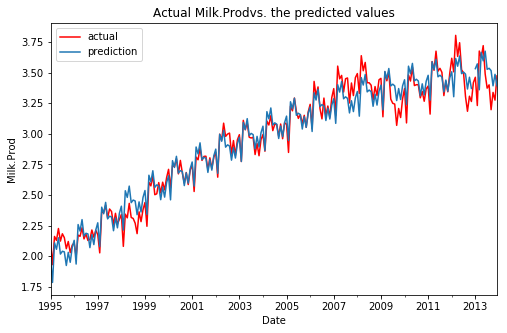

In [26]:
plot_mod_fit(dairy, 'Milk.Prod') 

In [27]:
RMSE(dairy.loc['2012-12-31':, 'Milk.Prod'].as_matrix(), dairy.loc['2012-12-31':, 'scores'])

C:\Users\h189037\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.4242102350256551